# 抗力係数

15秒以上のデータのDrag Force Coefficientの平均: 1.3853642570980391


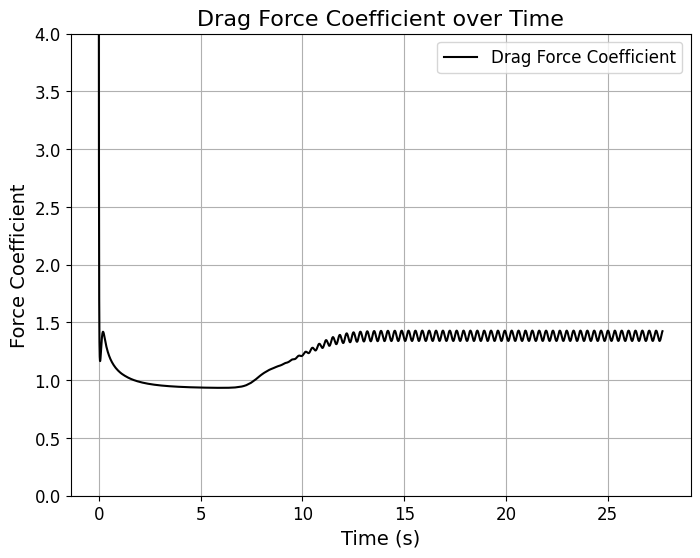

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# データの読み込み
dir_ = 0
df_dragForce = pd.read_table(f'./postProcessing/forces/{dir_}/coefficient.dat', skiprows=12)
df_dragForce = pd.DataFrame(df_dragForce)
columns_ = df_dragForce.columns

# グラフの作成
plt.figure(figsize=(8, 6))
plt.plot(df_dragForce[columns_[0]], df_dragForce[columns_[1]], label='Drag Force Coefficient', color="black")
plt.ylim([0, 4.0])
plt.grid()
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Force Coefficient", fontsize=14)
plt.title("Drag Force Coefficient over Time", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# グラフをPDFに保存
with PdfPages('Drag_force_coefficient.pdf') as pdf:
    pdf.savefig()  # 現在のグラフをPDFに保存

# 15秒以降のデータの平均値を計算
df_dragForce_filtered = df_dragForce[df_dragForce[columns_[0]] >= 15]  # 15秒以上のデータをフィルタ
mean_drag_force = np.mean(df_dragForce_filtered[columns_[1]])

# 平均値を出力
print(f"15秒以上のデータのDrag Force Coefficientの平均: {mean_drag_force}")


# 揚力係数

データファイルが見つかりました。データを読み込みます。
15秒以降の平均Lift force Coefficient: -0.0024333191652005466


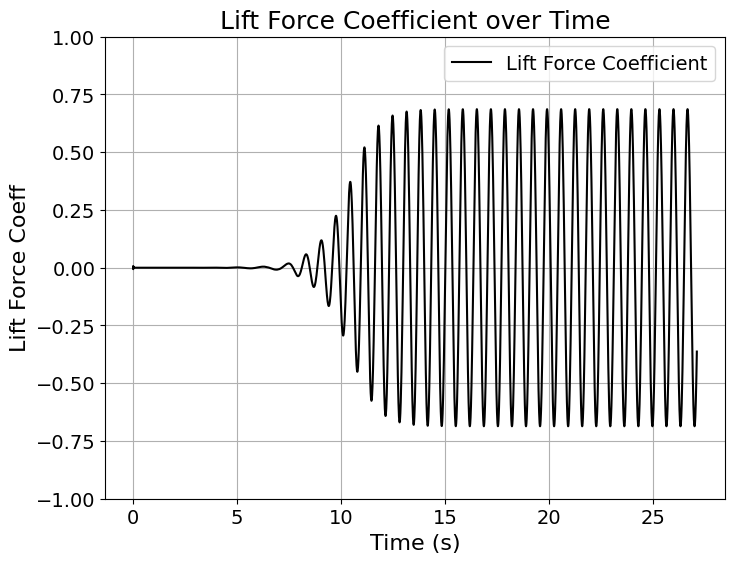

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

# データファイルのパス
dir_ = 0
file_path = f'./postProcessing/forces/{dir_}/coefficient.dat'

# ファイルが存在するか確認
if os.path.exists(file_path):
    # ファイルが存在する場合は読み込み
    df_liftForce = pd.read_table(file_path, skiprows=12)
    print("データファイルが見つかりました。データを読み込みます。")
else:
    # ファイルが存在しない場合はダミーデータを作成
    print("データファイルが見つかりません。ダミーデータを使用します。")
    time = np.linspace(0, 30, 100)  # 0から30秒までの時間データ
    Cl = np.sin(time) * 10  # ダミーのLift force coefficient
    df_liftForce = pd.DataFrame({'Time': time, 'Cl': Cl})

# データが存在するかどうかで異なる処理を実行
if 'Time' in df_liftForce.columns:
    time = df_liftForce['Time']
    Cl = df_liftForce['Cl']
else:
    columns_ = df_liftForce.columns
    time = df_liftForce[columns_[0]]
    Cl = df_liftForce[columns_[4]]

# 15秒以降のデータのみをフィルタリング
time_filtered = time[time >= 0]
Cl_filtered = Cl[time >= 0]

# フィルタ後のグラフをプロット（フォント大きめ、線は黒色）
plt.figure(figsize=(8, 6))
plt.plot(time_filtered, Cl_filtered, color='black', label='Lift Force Coefficient')
plt.grid()
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Lift Force Coeff", fontsize=16)
plt.ylim([-1, 1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Lift Force Coefficient over Time", fontsize=18)
plt.legend(fontsize=14)

# PDFに保存
with PdfPages('lift_force_coefficient_black_line.pdf') as pdf:
    pdf.savefig()

# 15秒以降の平均Lift force Coefficientを計算
mean_Cl_filtered = np.mean(Cl_filtered)
print(f"15秒以降の平均Lift force Coefficient: {mean_Cl_filtered}")

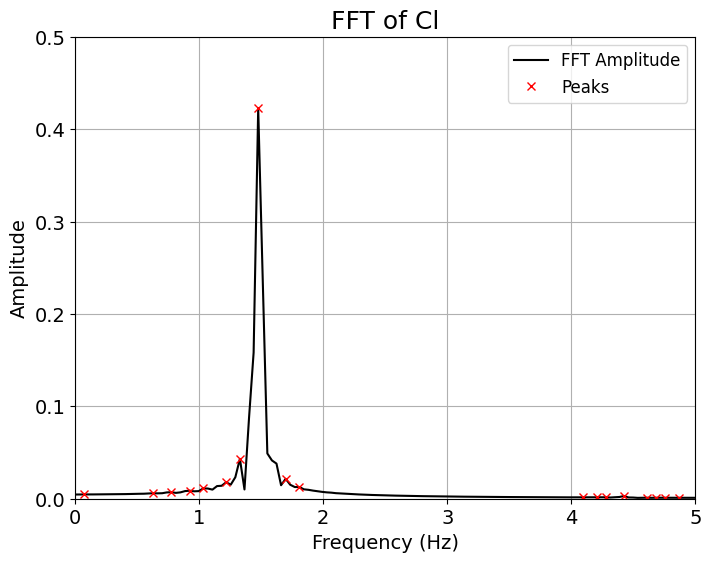

最大振幅を持つ周波数: 1.48 Hz
ストローハル数: 0.20 Hz


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import find_peaks
from matplotlib.backends.backend_pdf import PdfPages

# 仮に time と Cl が既に定義されていると仮定

# 15秒以降のデータのみをフィルタリング
time_filtered = time[time >= 15]
Cl_filtered = Cl[time >= 15]

# 線形補間を実行
interp_func = interp1d(time, Cl, kind='linear')
new_time = np.linspace(time.iloc[0], time.iloc[-1], num=len(Cl))  # 新しい均等な時間軸
new_Cl = interp_func(new_time)

# FFTを計算
N = len(new_Cl)
dT = new_time[1] - new_time[0]  # サンプリング間隔
yf = np.fft.fft(new_Cl)
xf = np.fft.fftfreq(N, dT)

# FFTの結果をプロット
plt.figure(figsize=(8, 6))
plt.plot(xf[:N//2], 2.0/N * np.abs(yf[:N//2]), label='FFT Amplitude', color="black")  # 正の周波数成分のみ
plt.title('FFT of Cl', fontsize=18)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,5])
plt.grid()

# ピークを検出
peaks, _ = find_peaks(2.0/N * np.abs(yf[:N//2]), height=0)  # 高さの閾値を設定
peak_freqs = xf[peaks]  # ピークの周波数
peak_amplitudes = 2.0/N * np.abs(yf[peaks])  # ピークの振幅

# ピークをプロット
plt.plot(peak_freqs, peak_amplitudes, "x", color='red', label='Peaks')
plt.legend(fontsize=12)
plt.ylim([0,0.5])

# PDFに保存
with PdfPages('fft_peaks_cl.pdf') as pdf:
    pdf.savefig()

plt.show()

# ピークの振幅が最大の周波数を取得
max_peak_index = np.argmax(peak_amplitudes)  # 最大振幅のインデックス
max_peak_freq = peak_freqs[max_peak_index]  # 最大振幅の周波数

# 最大振幅の周波数を表示
print(f"最大振幅を持つ周波数: {max_peak_freq:.2f} Hz")

# ストローハル数の計算
d = 20 / 1000  # 円柱の直径
U = 0.15  # 流速
f = max_peak_freq  # ピーク周波数
St = f * d / U # ストローハル数

print(f"ストローハル数: {St:.2f} Hz")

# 残差

time :  29.999 continuityError :  1.22146241e-13


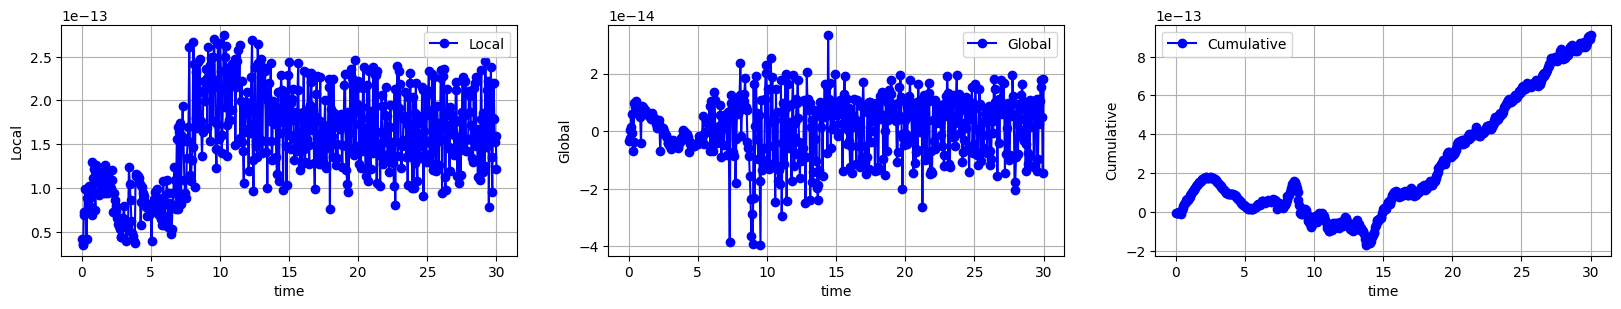

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def graph_func(df_continuityError, imin, imax, iposi,icol):
    plt.subplot(imin,imax,iposi)
    plt.plot(df_continuityError['time'],df_continuityError[icol],linestyle='solid',color='b',marker="o",label=icol)
    plt.xlabel('time')
    plt.ylabel(icol)
    plt.legend()
    plt.grid()

def df_continuityError_func(dir_):
    data_continuityError = np.loadtxt(f'./postProcessing/continuityError1/{dir_}/continuityError.dat')
    df_continuityError = pd.DataFrame(data_continuityError, columns=['time','Local','Global','Cumulative'])  
    return df_continuityError

def df_concat(dir_List):
    df = pd.DataFrame()
    for dir_ in dir_List:
        try:
            df_ = df_continuityError_func(dir_)
            df = pd.concat([df, df_])
        except Exception:
            print("Empty")
        
    return df

dir_List = os.listdir('./postProcessing/continuityError1')
df_continuityError = df_concat(dir_List)

plt.figure(figsize=(20,3))
graph_func(df_continuityError, 1,3,1,'Local')
graph_func(df_continuityError, 1,3,2,'Global')
graph_func(df_continuityError, 1,3,3,'Cumulative')

print('time : ',df_continuityError['time'].iloc[-1], 'continuityError : ', df_continuityError['Local'].iloc[-1])

df_continuityError.head()
plt.savefig("001_continuityError1.pdf",bbox_inches='tight')

p_initial=15696    0.00744
Name: p_initial     , dtype: float64


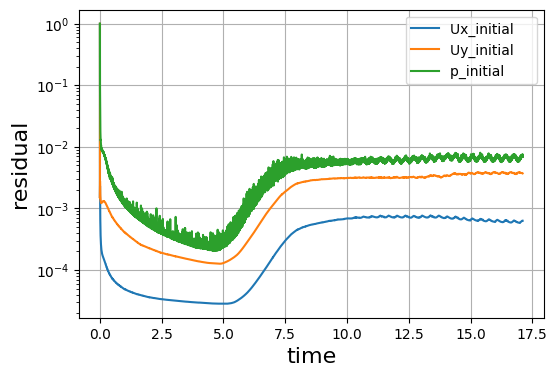

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


def graph_layout():
    plt.grid()
    plt.legend(loc='best',bbox_to_anchor=(1, 1))
    plt.yscale('log')
    plt.xlabel('time', fontsize=16)
    plt.ylabel('residual', fontsize=16)
    plt.savefig("solverInfo.png")

def df_residual_func(dir_):
    df_residual = pd.read_table(f'./postProcessing/solverInfo/{dir_}/solverInfo.dat',skiprows=1)
    df_residual = pd.DataFrame(df_residual)
    return df_residual

def df_concat(dir_List):
    df = pd.DataFrame()
    for dir_ in dir_List:
        try:
            df_ = df_residual_func(dir_)
            df = pd.concat([df, df_])
        except Exception:
            print("Empty")
        
    return df

dir_List = os.listdir('./postProcessing/solverInfo')
df_residual = df_concat(dir_List)

initial_residial = [data for data in df_residual.columns if "initial" in data]
final_residial = [data for data in df_residual.columns if "final" in data]
df_residual.plot(x="# Time        ",y=initial_residial, figsize=(6, 4))
graph_layout()
#df_residual.plot(x="# Time        ",y=final_residial)

print(f"p_initial={df_residual['p_initial     '][-1:]}")

# 体積流量

inlet_phi = -36.0
outlet_phi = 36.0


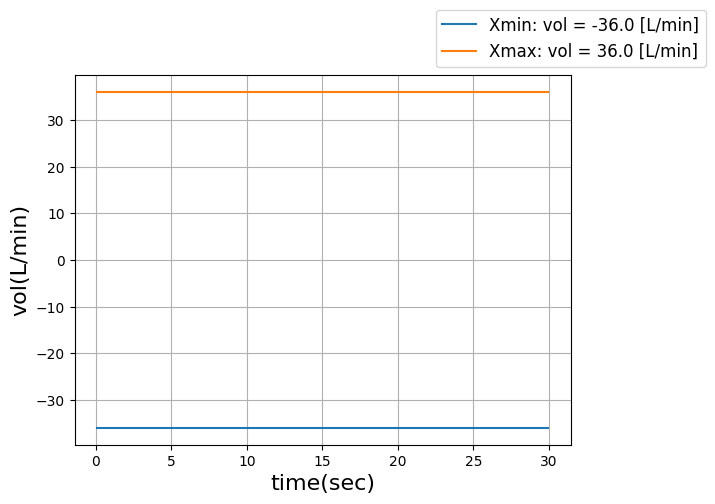

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def graph_surfaceField(df_phi, patchName):
    sum_phi = round(df_phi['sum(phi)'].iloc[-1],8)
    plt.plot(df_phi['# Time          '], df_phi['sum(phi)']*60*1000,
            label=f'{patchName}: vol = {str(round(sum_phi*60*1000,2))} [L/min]')
    plt.xlabel('time(sec)', fontsize=16)
    plt.ylabel('vol(L/min)', fontsize=16)
    plt.legend(loc='best',bbox_to_anchor=(1, 1))
    # plt.title(f'sum(phi):{df_phi["# Time          "].iloc[-1]}')

def sum_phi_func(df_phi):
    sum_phi = round(df_phi['sum(phi)'].iloc[-1],6)*60*1000
    return sum_phi

def df_phi_func(dir_, patchName):
    df_phi = pd.read_table(f'./postProcessing/{patchName}/{dir_}/surfaceFieldValue.dat',skiprows=4)
    df_phi = pd.DataFrame(df_phi)
    return df_phi

def df_concat(dir_List, patchName):
    df = pd.DataFrame()
    for dir_ in dir_List:
        try:
            df_ = df_phi_func(dir_, patchName)
            df = pd.concat([df, df_])
        except Exception:
            print("Empty")
        
    return df

surfaceField_list = ['Xmin','Xmax']

inlet_phi = 0
outlet_phi = 0
    
for patchName in surfaceField_list:
    dir_List = os.listdir(f'./postProcessing/{patchName}')
    df_phi = df_concat(dir_List, patchName)
    graph_surfaceField(df_phi, patchName)
    sum_phi = sum_phi_func(df_phi)
    if sum_phi <0:
        inlet_phi +=sum_phi

    else:
        outlet_phi +=sum_phi

print(f'inlet_phi = {inlet_phi}')
print(f'outlet_phi = {outlet_phi}')
df_concat

plt.grid()
plt.legend(loc="upper center",bbox_to_anchor=(1.0, 1.2), fontsize=12)
plt.savefig("003_surfaceFieldValue.pdf",bbox_inches='tight')

# 圧力係数($Cp = \frac{p-p_{\infty}}{\frac{1}{2}\rho U^2}$)

C:\Users\kusum\AppData\Local\Temp\ipykernel_36912\3903075071.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None)


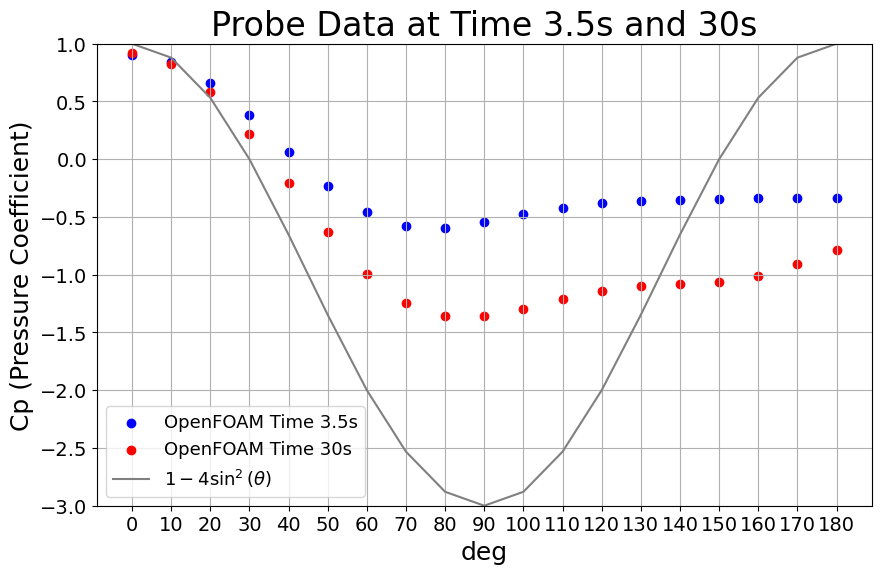

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# 絶対パスを使用してファイルパスを設定
file_path = './postProcessing/probes/0/p'  # ここに絶対パスを指定してください

# グラフに重ねたい時間のリスト
times = [3.5, 30]

# データの読み込み
try:
    data = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None)

    plt.figure(figsize=(10, 6))
    colors = ['blue', 'red']
    labels = ['OpenFOAM Time 3.5s', 'OpenFOAM Time 30s']

    for i, time in enumerate(times):
        # 指定時間のデータを抽出
        time_data = data[data[0] == time]

        if not time_data.empty:
            time_values = time_data.values.flatten()[1:]

            # データの正規化
            rho = 1.2
            U = 0.15
            time_normalized = time_values / (0.5 * rho * U**2)

            # プローブ番号
            probes = np.arange(len(time_normalized))

            # グラフにプロット
            plt.scatter(probes * 10, time_normalized, marker='o', color=colors[i], label=labels[i])

    # θの値を計算（プローブ番号を角度に変換）
    theta = np.radians(probes * 10)

    # 1 - 4sin(θ)^2の計算
    sin_curve = 1 - 4 * np.sin(theta)**2

    # 理論曲線のプロット
    plt.plot(probes * 10, sin_curve, linestyle='-', color='gray', label='$1 - 4\sin^2(\\theta)$')

    # グラフの装飾
    plt.title('Probe Data at Time 3.5s and 30s', fontsize=24)
    plt.xlabel('deg', fontsize=18)  # 横軸のフォントサイズを大きく
    plt.ylabel('Cp (Pressure Coefficient)', fontsize=18)  # 縦軸を英語で表示
    plt.grid(True)
    plt.legend(fontsize=13, loc='lower left')# 凡例の位置
    plt.ylim([-3, 1])
    plt.xticks(np.arange(0, 185, 10), fontsize=14)  # 横軸の数値を大きく
    plt.yticks(fontsize=14)  # 縦軸の数値を大きく

    # PDFに保存
    with PdfPages('probe_data_time_3.5_and_30.pdf') as pdf:
        pdf.savefig()  # 現在のグラフをPDFに保存

    plt.show()

except FileNotFoundError:
    print(f"ファイルが見つかりません: {file_path}")

# 圧力係数(Cp)

C:\Users\kusum\AppData\Local\Temp\ipykernel_36912\3344093828.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None)


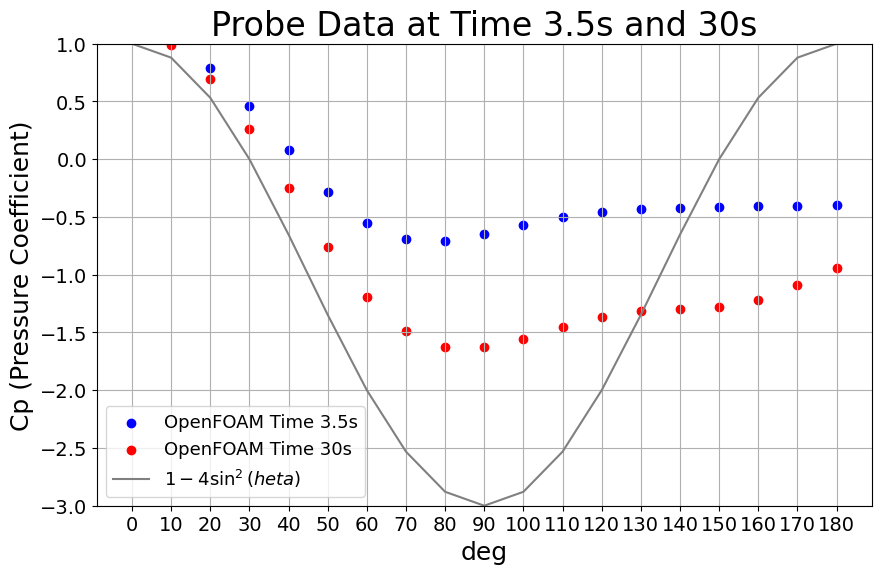

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# 絶対パスを使用してファイルパスを設定
file_path = './postProcessing/patchProbes/0/cp'  # ここに絶対パスを指定してください

# グラフに重ねたい時間のリスト
times = [3.5, 30]

# データの読み込み
try:
    data = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None)

    plt.figure(figsize=(10, 6))
    colors = ['blue', 'red']
    labels = ['OpenFOAM Time 3.5s', 'OpenFOAM Time 30s']

    for i, time in enumerate(times):
        # 指定時間のデータを抽出
        time_data = data[data[0] == time]

        if not time_data.empty:
            time_values = time_data.values.flatten()[1:]

            # データの正規化（不要）
            time_normalized = time_values

            # プローブ番号
            probes = np.arange(len(time_normalized))

            # グラフにプロット
            plt.scatter(probes * 10, time_normalized, marker='o', color=colors[i], label=labels[i])

    # θの値を計算（プローブ番号を角度に変換）
    theta = np.radians(probes * 10)

    # 1 - 4sin(θ)^2の計算
    sin_curve = 1 - 4 * np.sin(theta)**2

    # 理論曲線のプロット
    plt.plot(probes * 10, sin_curve, linestyle='-', color='gray', label='$1 - 4\sin^2(\theta)$')

    # グラフの装飾
    plt.title('Probe Data at Time 3.5s and 30s', fontsize=24)
    plt.xlabel('deg', fontsize=18)  # 横軸のフォントサイズを大きく
    plt.ylabel('Cp (Pressure Coefficient)', fontsize=18)  # 縦軸を英語で表示
    plt.grid(True)
    plt.legend(fontsize=13, loc='lower left')# 凡例の位置
    plt.ylim([-3, 1])
    plt.xticks(np.arange(0, 185, 10), fontsize=14)  # 横軸の数値を大きく
    plt.yticks(fontsize=14)  # 縦軸の数値を大きく

    # PDFに保存
    with PdfPages('patchProbe_data_time_3.5_and_30.pdf') as pdf:
        pdf.savefig()  # 現在のグラフをPDFに保存

    plt.show()

except FileNotFoundError:
    print(f"ファイルが見つかりません: {file_path}")


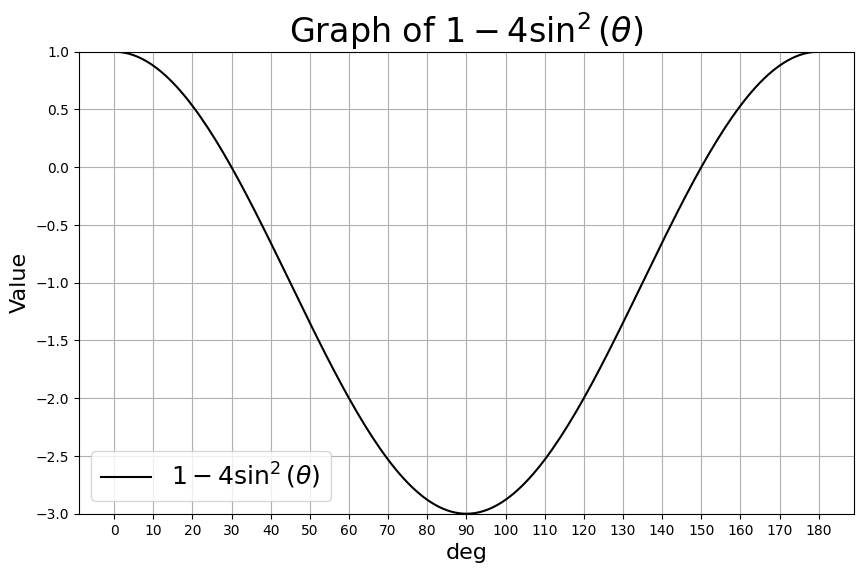

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# プローブ番号の設定
probes = np.arange(181)  # 0, 10, 20, ..., 180度までのデータ

# θの値を計算（プローブ番号を角度に変換）
theta = np.radians(probes * 1)

# 1 - 4sin(θ)^2の計算
sin_curve = 1 - 4 * np.sin(theta)**2

# グラフの作成
plt.figure(figsize=(10, 6))
plt.plot(probes * 1, sin_curve, linestyle='-', color='black', label='$1 - 4\sin^2(\\theta)$')

# グラフの装飾
plt.title('Graph of $1 - 4\sin^2(\\theta)$', fontsize=24)
plt.xlabel('deg', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.grid(True)
plt.legend(fontsize=18)
plt.ylim([-3, 1])
plt.xticks(np.arange(0, 185, 10))  # 横軸のメモリを10°ずつに設定

# PDFに保存
with PdfPages('sin_curve_only.pdf') as pdf:
    pdf.savefig()  # 現在のグラフをPDFに保存

plt.show()